## WEEK 10 ASSIGNMENT
- Data Cleaning
- Basic Analysis
- Data visualization with Matplotlib

In [ ]:
#import pandas and matplotlib

In [14]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [191]:
import numpy as np

In [ ]:
#import dataframe

In [16]:
df = pd.read_csv('cricket_db.csv')

In [18]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


### Data Cleaning

- Rename columns with abreviation for better understanding of the dataframe

In [23]:
df = df.rename(columns = {'Mat':'Matches', 'NO':'No_Outs', 'HS':'High_Inns_Score', 'BF':'Balls_Faced', 'SR':'Batting_Strike_Race'})

In [25]:
df.head()

,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


- Check for Null Values

In [28]:
df.isnull().any()

Player                 False
Span                   False
Matches                False
Inns                   False
No_Outs                False
Runs                   False
High_Inns_Score        False
Ave                    False
Balls_Faced            False
Batting_Strike_Race    False
100                    False
50                     False
0                      False
4s                     False
6s                     False
dtype: bool

- Check and Drop duplicate values

In [31]:
df.duplicated()

0     False
1      True
2     False
3     False
4     False
      ...  
64    False
65     True
66     True
67     True
68     True
Length: 69, dtype: bool

-So we have some duplicates; let have a look

In [34]:
df[df['Player'].duplicated() == 1]

,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
10,WR Hammond (ENG),1927-1947,85,140,16,7249,336*,58.45,7491+,38.07,22,24,4,419,27
65,Abid Ali (PAK),2019-2021,16,26,2,1180,215*,49.16,2445,48.26,4,3,2,148,5
66,MJ Clarke (AUS),2004-2015,115,198,22,8643,329*,49.10,15456,55.92,28,27,9,978,39
67,KC Bland (SA),1961-1966,21,39,5,1669,144*,49.08,885+,37.74,3,9,2,123,20
68,B Mitchell (SA),1929-1949,42,80,9,3471,189*,48.88,158+,29.11,8,21,3,41,1


In [ ]:
#Drop Duplicates

In [39]:
df = df.drop_duplicates()  #This would remove the duplicated values from the dataframe

In [41]:
df[df['Player'].duplicated() == 1] #Check if there are still duplicate values

,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s


- Split Columms

In [46]:
df['Span'] #original values

0     1928-1948
2     2015-2016
3     1963-1970
4     1930-1954
5     1924-1935
        ...    
60    2002-2014
61    1924-1934
62    1930-1938
63    2011-2024
64    1928-1934
Name: Span, Length: 63, dtype: object

In [48]:
df['Span'].str.split(pat = '-') #splits span column 

0     [1928, 1948]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
5     [1924, 1935]
          ...     
60    [2002, 2014]
61    [1924, 1934]
62    [1930, 1938]
63    [2011, 2024]
64    [1928, 1934]
Name: Span, Length: 63, dtype: object

In [52]:
df['Start_Year'] = df['Span'].str.split(pat = '-').str[0] 

In [54]:
df['Start_Year'] #new column

0     1928
2     2015
3     1963
4     1930
5     1924
      ... 
60    2002
61    1924
62    1930
63    2011
64    1928
Name: Start_Year, Length: 63, dtype: object

In [58]:
df['End_Year'] = df['Span'].str.split(pat = '-').str[1] 

In [60]:
df['End_Year'] #new column

0     1948
2     2016
3     1970
4     1954
5     1935
      ... 
60    2014
61    1934
62    1938
63    2024
64    1934
Name: End_Year, Length: 63, dtype: object

In [ ]:
#split countries from player

In [76]:
df['Country'] = df['Player'].str.split(pat = '(').str[1]

In [82]:
df['Country'] df['Country'].str.split(pat = ')').str[0]

In [84]:
df['Country'] #new column

0        AUS
2        AUS
3         SA
4         WI
5        ENG
       ...  
60    ICC/SA
61       AUS
62       AUS
63       IND
64       ENG
Name: Country, Length: 63, dtype: object

In [90]:
df.head()

,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s,Start_Year,End_Year,Country
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI
5,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202,6,1924,1935,ENG


In [94]:
 df['Player'] = df['Player'].str.split(pat = '(').str[0]

In [107]:
df.head()

,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s,Start_Year,End_Year,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS
2,AC Voges,2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley,1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI
5,H Sutcliffe,1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202,6,1924,1935,ENG


- Change Data types

In [125]:
df.dtypes

Player                  object
Span                    object
Matches                  int64
Inns                     int64
No_Outs                  int64
Runs                     int64
High_Inns_Score         object
Ave                    float64
Balls_Faced             object
Batting_Strike_Race    float64
100                      int64
50                       int64
0                        int64
4s                       int64
6s                       int64
Start_Year              object
End_Year                object
Country                 object
dtype: object

In [ ]:
 # convert Start_Year (object), End_Year (object) and Balls_Faced (object) to int

In [127]:
df=df.astype({'Start_Year':'int', 'End_Year': 'int'})

In [133]:
 df['High_Inns_Score'] = df['High_Inns_Score'].str.split(pat = '*').str[0]

In [135]:
df['High_Inns_Score'] = df['High_Inns_Score'].astype('int')

In [139]:
 df['Balls_Faced'] = df['Balls_Faced'].str.split(pat = '+').str[0]

In [143]:
df['Balls_Faced'] = pd.to_numeric(df['Balls_Faced'], errors='coerce').fillna(0).astype(int)

In [145]:
df['Balls_Faced'] = df['Balls_Faced'].astype('int')

In [147]:
df.dtypes 

Player                  object
Span                    object
Matches                  int64
Inns                     int64
No_Outs                  int64
Runs                     int64
High_Inns_Score          int32
Ave                    float64
Balls_Faced              int32
Batting_Strike_Race    float64
100                      int64
50                       int64
0                        int64
4s                       int64
6s                       int64
Start_Year               int32
End_Year                 int32
Country                 object
dtype: object

In [ ]:
#new column for the difference between the start and end year

In [152]:
df['career_length'] = df['End_Year'] - df['Start_Year']

In [160]:
df.head()


,Player,Span,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s,Start_Year,End_Year,Country,career_length
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24
5,H Sutcliffe,1924-1935,54,84,9,4555,194,60.73,6558,34.59,16,23,2,202,6,1924,1935,ENG,11


In [162]:
df.drop(['Span'], axis = 1) #Drop Span Column

,Player,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s,Start_Year,End_Year,Country,career_length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24
5,H Sutcliffe,54,84,9,4555,194,60.73,6558,34.59,16,23,2,202,6,1924,1935,ENG,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA,12
61,WH Ponsford,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS,10
62,SJ McCabe,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS,8
63,V Kohli,119,203,13,9145,254,48.13,16367,55.87,30,31,15,1020,30,2011,2024,IND,13


### Basic Analysis

In [ ]:
# Question 1: What is the average Career length

In [154]:
df['career_length'].mean()

12.968253968253968

In [ ]:
#Question 2: What's the Avg Batting_Strike_Race for players who played over 10years

In [156]:
df[df['career_length'] > 10] ['Batting_Strike_Race'].mean()

47.96727272727273

In [ ]:
# Question 3: Find number of players who played before 1960

In [158]:
df[df['Start_Year'] < 1960]['Player'].count()

23

In [ ]:
#Question 4: Whats the stats view of the dataframe

In [193]:
df.describe()

,Matches,Inns,No_Outs,Runs,High_Inns_Score,Ave,Balls_Faced,Batting_Strike_Race,100,50,0,4s,6s,Start_Year,End_Year,career_length
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,79.587302,135.031746,13.952381,6391.841270,251.111111,53.646508,10017.619048,47.673175,19.222222,28.396825,7.777778,649.746032,27.317460,1971.888889,1984.857143,12.968254
std,51.336221,87.364636,11.221277,4051.915713,60.996328,7.107753,9145.370342,15.510421,12.497025,18.776736,5.580624,523.876616,27.163677,35.237952,34.011316,5.797575
min,14.000000,20.000000,1.000000,990.000000,122.000000,48.000000,0.000000,0.000000,1.000000,3.000000,1.000000,37.000000,0.000000,1893.000000,1905.000000,1.000000
25%,26.000000,44.500000,5.000000,2223.000000,209.500000,49.425000,2072.500000,42.465000,7.000000,10.500000,3.000000,163.000000,5.000000,1937.000000,1956.000000,9.500000
50%,79.000000,132.000000,12.000000,6235.000000,247.000000,51.850000,7866.000000,49.160000,19.000000,28.000000,7.000000,543.000000,20.000000,1978.000000,1994.000000,14.000000
75%,118.500000,199.000000,19.000000,9013.000000,278.000000,56.535000,16211.000000,55.775000,29.500000,42.000000,12.000000,1056.000000,41.500000,2000.500000,2014.000000,17.000000
max,200.000000,329.000000,49.000000,15921.000000,400.000000,99.940000,31258.000000,87.730000,51.000000,68.000000,22.000000,2058.000000,97.000000,2023.000000,2024.000000,24.000000


### Data visualization with Matplotlib

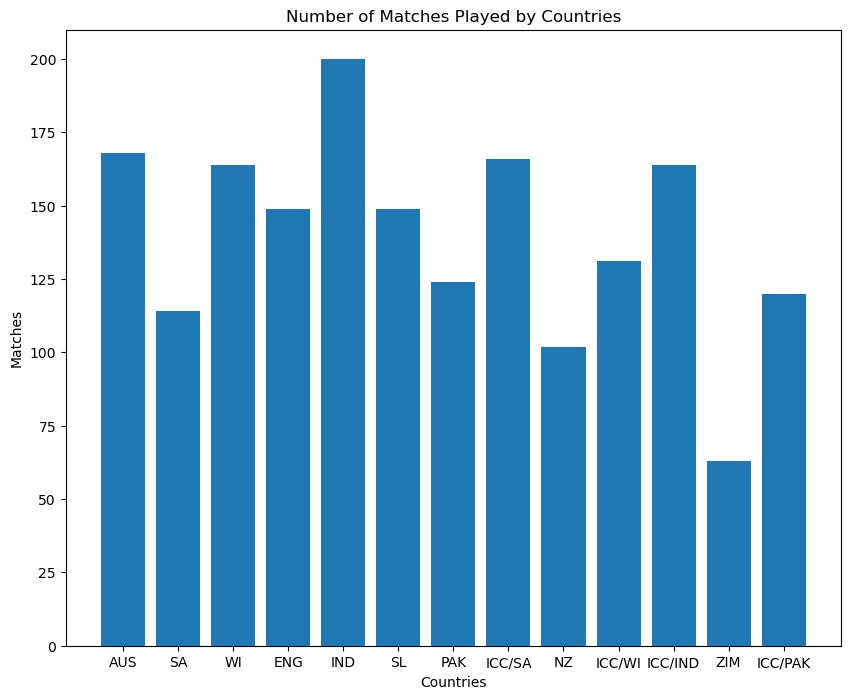

In [262]:
plt.figure(figsize = (10, 8))

plt.bar(df['Country'], df['Matches'])

plt.title("Number of Matches Played by Countries")
plt.xlabel("Countries")
plt.ylabel("Matches")
plt.show()

The bar chart above shows the trend in the number of matches played by different countries. It highlights that IND (India) has played the highest number of matches, while ZIM (Zimbabwe) has played the fewest.